# **Installation of PyTorch**


In [0]:
# Bookkeeping
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision


**Dependencies**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import torch


**Dataset**

In [3]:
# Convert array to Numpy array
train_X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1], dtype=np.float)


train_Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3], dtype=np.float)
print(train_X.shape[0])
print(train_X.shape[0])

17
17


 **Reshape of array**

In [0]:
train_X = np.reshape(train_X,(17,1))
train_Y = np.reshape(train_Y,(17,1))

In [5]:
print(train_X.shape)
print(train_Y.shape)
print(train_X.dtype)

(17, 1)
(17, 1)
float64


**Convert Numpy to Tensor**

In [6]:
x_train_T  = torch.from_numpy(train_X).float()
y_train_T = torch.from_numpy(train_Y).float()
x_train_T.type()

'torch.FloatTensor'

In [7]:
print(x_train_T)
print(y_train_T)
print(type(x_train_T))


  3.3000
  4.4000
  5.5000
  6.7100
  6.9300
  4.1680
  9.7790
  6.1820
  7.5900
  2.1670
  7.0420
 10.7910
  5.3130
  7.9970
  5.6540
  9.2700
  3.1000
[torch.FloatTensor of size 17x1]


 1.7000
 2.7600
 2.0900
 3.1900
 1.6940
 1.5730
 3.3660
 2.5960
 2.5300
 1.2210
 2.8270
 3.4650
 1.6500
 2.9040
 2.4200
 2.9400
 1.3000
[torch.FloatTensor of size 17x1]

<class 'torch.FloatTensor'>


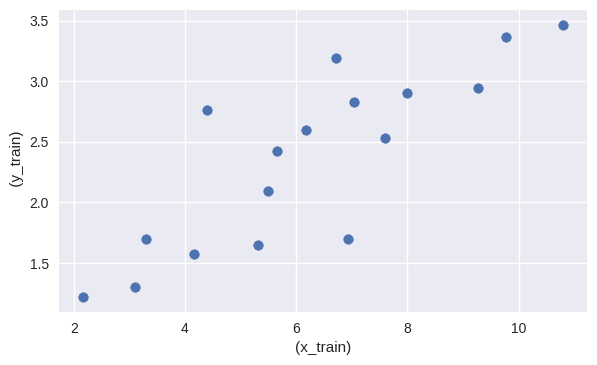

In [8]:
# Plotting example dataset
plt.figure(figsize = (15,4),dpi=100)
plt.subplot(121)
plt.scatter(x_train_T,y_train_T)
plt.xlabel("(x_train)")
plt.ylabel(" (y_train)")
plt.show()

Step 1: Create Model Class

Step 2: Instantiate Model Class

Step 3: Instantiate loss class

Step 4: Instantiate Optimizer class

Step 5: Train Model

# **Building Model**

Import dependencies

In [0]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [0]:
#Step 1: Create Model Class

# Linear Regression Model
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  # input and output is 1 dimension

    def forward(self, x):
        out = self.linear(x)
        return out

In [0]:
#Step 2: Instantiate Model Clas s
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim, output_dim)

In [0]:
# Step 3: Instantiate loss class
criterion = nn.MSELoss()

learning_rate = 0.0001

#Step 4: Instantiate Optimizer class
#optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate, momentum=0.9)
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [0]:
epochs = 10000

In [15]:
# Step 5: Train Model

for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable
    inputs = Variable((x_train_T))
    labels = Variable((y_train_T))
    
    
    #Clear gradient w.r.t parameters(To prevent updating with  previous gradient)
    optimizer.zero_grad()
    
    #Forward to get output
    outputs = model(inputs)
    
    
    #Calculate Loss
    loss = criterion(outputs, labels)
    
    
    # Getting gradients w.r.t parameters (scalar loss)
    loss.backward()
    
    #updating parameters (m and b)
    optimizer.step()
    
    
    print('epoch {}, loss {}'.format(epoch, loss.data[0]))

epoch 1, loss 21.972518920898438
epoch 2, loss 21.582658767700195
epoch 3, loss 21.199813842773438
epoch 4, loss 20.823850631713867
epoch 5, loss 20.454647064208984
epoch 6, loss 20.092084884643555
epoch 7, loss 19.736040115356445
epoch 8, loss 19.38640022277832
epoch 9, loss 19.043046951293945
epoch 10, loss 18.70586395263672
epoch 11, loss 18.374752044677734
epoch 12, loss 18.049589157104492
epoch 13, loss 17.730274200439453
epoch 14, loss 17.416702270507812
epoch 15, loss 17.1087703704834
epoch 16, loss 16.806371688842773
epoch 17, loss 16.509414672851562
epoch 18, loss 16.217796325683594
epoch 19, loss 15.931421279907227
epoch 20, loss 15.650195121765137
epoch 21, loss 15.374031066894531
epoch 22, loss 15.102829933166504
epoch 23, loss 14.836504936218262
epoch 24, loss 14.574967384338379
epoch 25, loss 14.318136215209961
epoch 26, loss 14.065921783447266
epoch 27, loss 13.818243026733398
epoch 28, loss 13.575019836425781
epoch 29, loss 13.336167335510254
epoch 30, loss 13.101612091


epoch 1245, loss 0.28515854477882385
epoch 1246, loss 0.2851521670818329
epoch 1247, loss 0.28514575958251953
epoch 1248, loss 0.28513941168785095
epoch 1249, loss 0.28513309359550476
epoch 1250, loss 0.28512662649154663
epoch 1251, loss 0.28512027859687805
epoch 1252, loss 0.2851139008998871
epoch 1253, loss 0.2851075232028961
epoch 1254, loss 0.2851012051105499
epoch 1255, loss 0.2850947976112366
epoch 1256, loss 0.2850884199142456
epoch 1257, loss 0.285082072019577
epoch 1258, loss 0.28507569432258606
epoch 1259, loss 0.2850692868232727
epoch 1260, loss 0.2850629687309265
epoch 1261, loss 0.28505656123161316
epoch 1262, loss 0.2850501835346222
epoch 1263, loss 0.285043865442276
epoch 1264, loss 0.28503745794296265
epoch 1265, loss 0.2850310802459717
epoch 1266, loss 0.2850247025489807
epoch 1267, loss 0.28501832485198975
epoch 1268, loss 0.28501203656196594
epoch 1269, loss 0.2850055694580078
epoch 1270, loss 0.284999281167984
epoch 1271, loss 0.28499290347099304
epoch 1272, loss 0

epoch 2487, loss 0.27747488021850586
epoch 2488, loss 0.27746886014938354
epoch 2489, loss 0.277462899684906
epoch 2490, loss 0.2774568796157837
epoch 2491, loss 0.27745088934898376
epoch 2492, loss 0.27744483947753906
epoch 2493, loss 0.2774388790130615
epoch 2494, loss 0.2774328589439392
epoch 2495, loss 0.27742689847946167
epoch 2496, loss 0.2774208188056946
epoch 2497, loss 0.27741482853889465
epoch 2498, loss 0.2774088680744171
epoch 2499, loss 0.2774028480052948
epoch 2500, loss 0.2773968577384949
epoch 2501, loss 0.27739089727401733
epoch 2502, loss 0.2773849368095398
epoch 2503, loss 0.2773788869380951
epoch 2504, loss 0.27737289667129517
epoch 2505, loss 0.27736690640449524
epoch 2506, loss 0.2773609459400177
epoch 2507, loss 0.2773549258708954
epoch 2508, loss 0.27734890580177307
epoch 2509, loss 0.27734288573265076
epoch 2510, loss 0.27733689546585083
epoch 2511, loss 0.2773309051990509
epoch 2512, loss 0.2773248851299286
epoch 2513, loss 0.27731889486312866
epoch 2514, loss

epoch 3717, loss 0.2703087031841278
epoch 3718, loss 0.27030301094055176
epoch 3719, loss 0.2702973783016205
epoch 3720, loss 0.2702917158603668
epoch 3721, loss 0.27028602361679077
epoch 3722, loss 0.2702804505825043
epoch 3723, loss 0.27027472853660583
epoch 3724, loss 0.27026912569999695
epoch 3725, loss 0.2702634334564209
epoch 3726, loss 0.270257830619812
epoch 3727, loss 0.27025213837623596
epoch 3728, loss 0.2702464759349823
epoch 3729, loss 0.27024081349372864
epoch 3730, loss 0.27023521065711975
epoch 3731, loss 0.2702295780181885
epoch 3732, loss 0.27022385597229004
epoch 3733, loss 0.27021822333335876
epoch 3734, loss 0.2702125906944275
epoch 3735, loss 0.27020689845085144
epoch 3736, loss 0.27020126581192017
epoch 3737, loss 0.2701956331729889
epoch 3738, loss 0.27018997073173523
epoch 3739, loss 0.27018430829048157
epoch 3740, loss 0.2701786458492279
epoch 3741, loss 0.2701730728149414
epoch 3742, loss 0.27016738057136536
epoch 3743, loss 0.27016180753707886
epoch 3744, lo

epoch 5040, loss 0.2630636990070343
epoch 5041, loss 0.26305845379829407
epoch 5042, loss 0.26305317878723145
epoch 5043, loss 0.26304781436920166
epoch 5044, loss 0.2630425989627838
epoch 5045, loss 0.26303723454475403
epoch 5046, loss 0.263031929731369
epoch 5047, loss 0.263026624917984
epoch 5048, loss 0.263021320104599
epoch 5049, loss 0.2630160450935364
epoch 5050, loss 0.26301074028015137
epoch 5051, loss 0.26300546526908875
epoch 5052, loss 0.26300016045570374
epoch 5053, loss 0.26299482583999634
epoch 5054, loss 0.2629895508289337
epoch 5055, loss 0.2629842758178711
epoch 5056, loss 0.2629789710044861
epoch 5057, loss 0.2629735469818115
epoch 5058, loss 0.2629683315753937
epoch 5059, loss 0.26296305656433105
epoch 5060, loss 0.26295775175094604
epoch 5061, loss 0.2629524767398834
epoch 5062, loss 0.262947142124176
epoch 5063, loss 0.2629418671131134
epoch 5064, loss 0.26293662190437317
epoch 5065, loss 0.26293128728866577
epoch 5066, loss 0.2629259526729584
epoch 5067, loss 0.2


epoch 5963, loss 0.2582778036594391
epoch 5964, loss 0.25827279686927795
epoch 5965, loss 0.25826773047447205
epoch 5966, loss 0.25826263427734375
epoch 5967, loss 0.25825759768486023
epoch 5968, loss 0.2582525312900543
epoch 5969, loss 0.258247435092926
epoch 5970, loss 0.2582423985004425
epoch 5971, loss 0.2582373023033142
epoch 5972, loss 0.2582322955131531
epoch 5973, loss 0.2582271695137024
epoch 5974, loss 0.25822213292121887
epoch 5975, loss 0.25821706652641296
epoch 5976, loss 0.25821200013160706
epoch 5977, loss 0.25820687413215637
epoch 5978, loss 0.25820183753967285
epoch 5979, loss 0.25819671154022217
epoch 5980, loss 0.25819170475006104
epoch 5981, loss 0.25818660855293274
epoch 5982, loss 0.2581816017627716
epoch 5983, loss 0.2581765353679657
epoch 5984, loss 0.258171409368515
epoch 5985, loss 0.2581664025783539
epoch 5986, loss 0.2581613063812256
epoch 5987, loss 0.2581562399864197
epoch 5988, loss 0.2581511437892914
epoch 5989, loss 0.25814610719680786
epoch 5990, loss


epoch 7277, loss 0.25182420015335083
epoch 7278, loss 0.2518194615840912
epoch 7279, loss 0.25181469321250916
epoch 7280, loss 0.2518099844455719
epoch 7281, loss 0.25180521607398987
epoch 7282, loss 0.25180044770240784
epoch 7283, loss 0.2517956495285034
epoch 7284, loss 0.25179097056388855
epoch 7285, loss 0.25178611278533936
epoch 7286, loss 0.2517814338207245
epoch 7287, loss 0.25177666544914246
epoch 7288, loss 0.2517719268798828
epoch 7289, loss 0.2517671585083008
epoch 7290, loss 0.2517624497413635
epoch 7291, loss 0.2517576515674591
epoch 7292, loss 0.2517528831958771
epoch 7293, loss 0.25174814462661743
epoch 7294, loss 0.2517434358596802
epoch 7295, loss 0.25173869729042053
epoch 7296, loss 0.2517338991165161
epoch 7297, loss 0.25172919034957886
epoch 7298, loss 0.25172439217567444
epoch 7299, loss 0.2517196238040924
epoch 7300, loss 0.25171488523483276
epoch 7301, loss 0.2517101764678955
epoch 7302, loss 0.2517054080963135
epoch 7303, loss 0.25170063972473145
epoch 7304, lo

epoch 8583, loss 0.24580520391464233
epoch 8584, loss 0.2458006888628006
epoch 8585, loss 0.24579623341560364
epoch 8586, loss 0.24579177796840668
epoch 8587, loss 0.24578730762004852
epoch 8588, loss 0.24578285217285156
epoch 8589, loss 0.2457783967256546
epoch 8590, loss 0.24577392637729645
epoch 8591, loss 0.2457694709300995
epoch 8592, loss 0.24576501548290253
epoch 8593, loss 0.24576056003570557
epoch 8594, loss 0.2457560896873474
epoch 8595, loss 0.24575166404247284
epoch 8596, loss 0.2457471787929535
epoch 8597, loss 0.24574270844459534
epoch 8598, loss 0.245738223195076
epoch 8599, loss 0.24573376774787903
epoch 8600, loss 0.24572932720184326
epoch 8601, loss 0.2457248717546463
epoch 8602, loss 0.24572038650512695
epoch 8603, loss 0.24571593105793
epoch 8604, loss 0.24571146070957184
epoch 8605, loss 0.24570700526237488
epoch 8606, loss 0.24570254981517792
epoch 8607, loss 0.24569809436798096
epoch 8608, loss 0.24569359421730042
epoch 8609, loss 0.24568919837474823
epoch 8610, 


epoch 9899, loss 0.24011404812335968
epoch 9900, loss 0.2401098608970642
epoch 9901, loss 0.24010568857192993
epoch 9902, loss 0.24010150134563446
epoch 9903, loss 0.2400972992181778
epoch 9904, loss 0.24009311199188232
epoch 9905, loss 0.24008890986442566
epoch 9906, loss 0.24008473753929138
epoch 9907, loss 0.2400805503129959
epoch 9908, loss 0.24007634818553925
epoch 9909, loss 0.24007222056388855
epoch 9910, loss 0.2400679886341095
epoch 9911, loss 0.24006378650665283
epoch 9912, loss 0.24005959928035736
epoch 9913, loss 0.2400553971529007
epoch 9914, loss 0.24005120992660522
epoch 9915, loss 0.24004706740379333
epoch 9916, loss 0.2400428205728531
epoch 9917, loss 0.2400387078523636
epoch 9918, loss 0.24003449082374573
epoch 9919, loss 0.24003031849861145
epoch 9920, loss 0.24002616107463837
epoch 9921, loss 0.2400219589471817
epoch 9922, loss 0.24001777172088623
epoch 9923, loss 0.24001356959342957
epoch 9924, loss 0.2400093972682953
epoch 9925, loss 0.24000518023967743
epoch 992

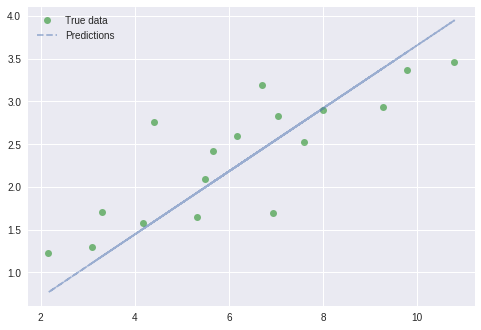

In [16]:
# Clear figure
plt.clf()

# Get predictions
predicted = model(Variable((x_train_T))).data.numpy()

# Plot true data
plt.plot(x_train_T.numpy(), y_train_T.numpy(), 'go', label= 'True data', alpha=.5)

# Plot predictions
plt.plot(x_train_T.numpy(), predicted, '--', label="Predictions", alpha=.5)


# Legend and plot
plt.legend(loc='best')
plt.show()

# **Use matrix operation for obtaining the m and b.(Not really important)**

The aim of this excerise it to compute the paramaters of the line**(m and b**)

In [17]:
x2 =x_train_T[2]
print(x2)
y2 = model(Variable((x_train_T[2]))).data.numpy()
print(y2)


 5.5000
[torch.FloatTensor of size 1]

[1.9961069]


In [18]:
x5 =x_train_T[5]
print(x5)
y5 = model(Variable((x_train_T[5]))).data.numpy()
print(y5)


 4.1680
[torch.FloatTensor of size 1]

[1.5044882]


![alt text](http://dwightreid.com/blog/wp-content/uploads/2015/09/simulEqn.png)

In [19]:
A = np.array([[5.5,1],[4.168, 1]])
print(A)

[[5.5   1.   ]
 [4.168 1.   ]]


In [20]:
B = np.array([2.1827922,1.8476133])
print(B)

[2.1827922 1.8476133]


In [0]:
 C = np.linalg.solve(A,B)

In [22]:
print(C)

[0.25163581 0.79879524]


Therefore the equation of a line y= 0.25163581x + 0.79879524

In [0]:
# Save model
#torch.save(model,'model.pth')

In [0]:
! pwd

In [0]:
  # Test model